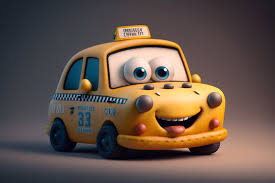

#                                         Texi Price Prediction Project 

 Data Requirement for Project 

1 - Problem  :- Regression/ Classification

2 - Data     :- OLA , Uber

3 - Modules Call :- Linear Regression , Logistic Regression , Decision Tree , Random Forest , SVM , KNN , Naive Base , Pandas , Numpy , Matplot, Seaborn

4 - EDA  :- Explore Data Analysis , Data Visualisation 

5 - Data Preprocessing  :- Feature Engineering/ Feature Scalling

6 - Error Find and Solve :- Lasso , Ridge , MSE , RMSE , MAE , R2_Score

7 - Hypertunig :- Grid Search Cv, Cross vel Score

8 - Metrics :- Classification Report , Precision , F1_ Score

9 - Best Model

10 - Value Prediction 

11 - HTML structure 

12 - Css , JS

13 - Backend - Flask , Django 

14 - Data Base - My SQL 

In [ ]:
# problem Phase 

 # 1 Check unwanted Columns in Data Set 
 # 2 how to find distance in km ,miles between pickup point to drop point 
 # 3 Pickup Latitude above 90. and remove its row
  # 4 Convert Object into Date time 
 # 5  New column add with year , day ,month time 
#  6 EDA problem :- data present in 2015 only 6 month
#  7 data mix up with integer and float as well as negative and positive value solve by  feature Scalling 

# 8 PCA not be perform good beacuse pca give 86% score on one row
# 9 Find Solution for Hyperparameter Tuning
# 10 Use of Threading Concept for reduce time taken code 
# 11 Problem are not solved 
# 12 Find Predicted Price 

# Problem :- Regression    (Find Price Of Texi for Traveling)

# Import Modules

In [2]:
# Data Analysis  Libraray 

import pandas as pd
import numpy as np
#-----------------------------------------------------------
# Visualisation Libraray
import matplotlib.pyplot as plt
import seaborn as sns 
#------------------------------------------------------------------
# Prediction Library ( Machine Learning Libraray )

from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
#---------------------------------------------------------------------------
# Data Base 
import pymysql as py
 
    
#--------------------------------------------------------------------------
# other Important Libraray
import time
import os
import warnings
from datetime import datetime

#------------------------------------------------------------------------------------
# Function Library of Prediction

from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report,r2_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


#---------------------------------------------------------------------------------------
# Boosting
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor



#---------------------------------------------------------------------------------------------

warnings.filterwarnings('ignore')
print('done Succesfully')
    

done Succesfully


# Data Load

In [3]:
df = pd.read_csv(r'C:\Users\arjun\Downloads\Taxi_data.csv')

In [4]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
...,...,...,...,...,...,...,...,...
9994,2010-02-15 15:52:46.0000006,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3
9995,2010-08-27 08:45:01.0000004,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9996,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9997,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1


In [5]:
# check Row and Columns

df.shape

(9999, 8)

In [6]:
# Check Statistics of Data

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,11.235298,-72.466507,39.920367,-72.473937,39.893202,1.644764
std,9.584884,10.610249,7.319294,10.580250,6.340231,1.271276
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992054,40.734546,-73.991097,40.735236,1.000000
50%,8.500000,-73.981753,40.752694,-73.980057,40.753740,1.000000
75%,12.500000,-73.966924,40.767695,-73.963501,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9999 non-null   object 
 1   fare_amount        9999 non-null   float64
 2   pickup_datetime    9999 non-null   object 
 3   pickup_longitude   9999 non-null   float64
 4   pickup_latitude    9999 non-null   float64
 5   dropoff_longitude  9999 non-null   float64
 6   dropoff_latitude   9999 non-null   float64
 7   passenger_count    9999 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


In [8]:
# remove unwanted Columns

df1=df.drop('key',axis =1)
df1

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
...,...,...,...,...,...,...,...
9994,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3
9995,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9996,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9997,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1


In [9]:
df1.shape

(9999, 7)

In [10]:
df1.sample()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2606,8.9,2009-09-21 19:15:00 UTC,-73.972013,40.75541,-73.99838,40.723905,1


In [11]:
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1


# Problem 1 :- Find Distance between two Point 

Find Distance in miles between Pickup point to Drop Point 

In [12]:
!pip install geopy

In [13]:
 from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).km)


866.4554329098687


In [14]:
# make a Function for calculate distance
from geopy.distance import geodesic

def calculate_distance(pickup_lat,
                      pickup_long,
                      dropoff_lat,
                      dropoff_long):
    return geodesic((pickup_lat,
                      pickup_long),
                      (dropoff_lat,
                      dropoff_long)).miles



In [15]:
calculate_distance(40.748950,-73.973925,40.753695,-73.966458)

0.510622061456767

In [16]:
calculate_distance(41.49008, -71.312796,41.499498, -81.695391)

538.3904453677204

In [17]:
# row approach by lambda funstion 

df1.apply(lambda row:  calculate_distance(row['pickup_latitude'], 
                                          row['pickup_longitude'],
                                          row['dropoff_latitude'],
                                          row['dropoff_longitude']),
                                          axis=1)

ValueError: Latitude must be in the [-90; 90] range.

In [18]:
# pickup Latitude above with 90.

df2 = df1[df1['pickup_latitude']<=90]
df2

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
...,...,...,...,...,...,...,...
9994,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3
9995,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9996,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9997,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1


In [19]:
df2.shape

(9998, 7)

In [20]:
df2.apply(lambda row:  calculate_distance(row['pickup_latitude'], 
                                          row['pickup_longitude'],
                                          row['dropoff_latitude'],
                                          row['dropoff_longitude']),
                                          axis=1)

0       0.510622
1       0.639764
2       5.246511
3       0.863167
4       1.737223
          ...   
9994    1.257887
9995    0.636248
9996    2.152711
9997    0.725098
9998    2.520452
Length: 9998, dtype: float64

In [21]:
# store distance in New Columns

In [22]:
df2['Distance']  = df2.apply(lambda row:  calculate_distance(row['pickup_latitude'], 
                                          row['pickup_longitude'],
                                          row['dropoff_latitude'],
                                          row['dropoff_longitude']),
                                          axis=1)

In [23]:
df2

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1,0.510622
1,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.639764
2,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.246511
3,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863167
4,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.737223
...,...,...,...,...,...,...,...,...
9994,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3,1.257887
9995,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1,0.636248
9996,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2,2.152711
9997,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1,0.725098


In [24]:
df2.shape

(9998, 8)

# Problem Solve 

# Problem 2 :-  Time and Date Convert into new Tme and Date Column

In [25]:
df2

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1,0.510622
1,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.639764
2,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.246511
3,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863167
4,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.737223
...,...,...,...,...,...,...,...,...
9994,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3,1.257887
9995,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1,0.636248
9996,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2,2.152711
9997,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1,0.725098


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        9998 non-null   float64
 1   pickup_datetime    9998 non-null   object 
 2   pickup_longitude   9998 non-null   float64
 3   pickup_latitude    9998 non-null   float64
 4   dropoff_longitude  9998 non-null   float64
 5   dropoff_latitude   9998 non-null   float64
 6   passenger_count    9998 non-null   int64  
 7   Distance           9998 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 703.0+ KB


In [27]:
df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'])

In [28]:
df2

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,4.1,2010-04-23 15:12:00+00:00,-73.973925,40.748950,-73.966458,40.753695,1,0.510622
1,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.639764
2,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.246511
3,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.863167
4,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.737223
...,...,...,...,...,...,...,...,...
9994,6.5,2010-02-15 15:52:46+00:00,-74.004429,40.721271,-74.006460,40.739435,3,1.257887
9995,4.1,2010-08-27 08:45:01+00:00,-73.983616,40.756005,-73.976169,40.763282,1,0.636248
9996,11.7,2011-10-26 10:44:00+00:00,-73.988277,40.748970,-73.963712,40.773958,2,2.152711
9997,5.7,2011-12-16 15:37:00+00:00,-74.002112,40.748727,-73.992467,40.756252,1,0.725098


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        9998 non-null   float64            
 1   pickup_datetime    9998 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9998 non-null   float64            
 3   pickup_latitude    9998 non-null   float64            
 4   dropoff_longitude  9998 non-null   float64            
 5   dropoff_latitude   9998 non-null   float64            
 6   passenger_count    9998 non-null   int64              
 7   Distance           9998 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 703.0 KB


In [30]:
df2['year'] = df2['pickup_datetime'].dt.year
df2['month'] = df2['pickup_datetime'].dt.month
df2['Day']   = df2['pickup_datetime'].dt.day
df2['Hour']   = df2['pickup_datetime'].dt.hour
df2['Minute']   = df2['pickup_datetime'].dt.minute
df2['Second']   = df2['pickup_datetime'].dt.second


In [31]:
df2['pickup_datetime'].dt.year

0       2010
1       2009
2       2010
3       2011
4       2012
        ... 
9994    2010
9995    2010
9996    2011
9997    2011
9998    2013
Name: pickup_datetime, Length: 9998, dtype: int64

In [32]:
df2

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,4.1,2010-04-23 15:12:00+00:00,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6.5,2010-02-15 15:52:46+00:00,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,4.1,2010-08-27 08:45:01+00:00,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,11.7,2011-10-26 10:44:00+00:00,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,5.7,2011-12-16 15:37:00+00:00,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


In [33]:
df2.shape

(9998, 14)

In [34]:
df2.drop('pickup_datetime',axis=1,inplace =True)

In [35]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,4.1,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6.5,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,4.1,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,11.7,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,5.7,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


# Problem Solve

#  Data Analysis and Visualisation 

In [36]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,4.1,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6.5,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,4.1,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,11.7,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,5.7,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


# Uni varient Analysis

<Axes: ylabel='Frequency'>

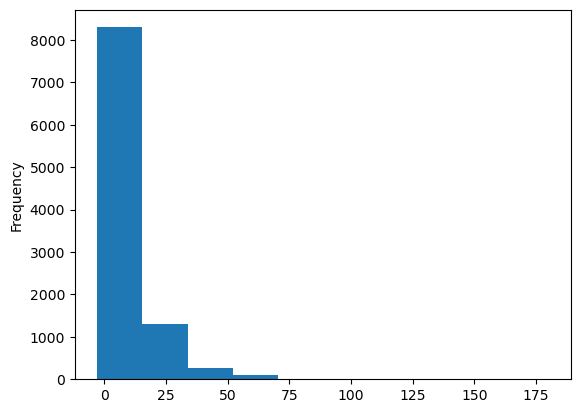

In [37]:
df2['fare_amount'].plot.hist()

<Axes: xlabel='fare_amount', ylabel='Count'>

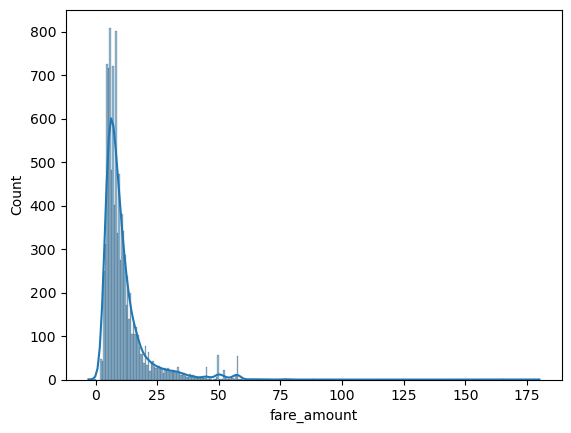

In [38]:
sns.histplot(df2['fare_amount'],kde=True)

Highest Payment Under 2 to 20 doller in data 



<Axes: >

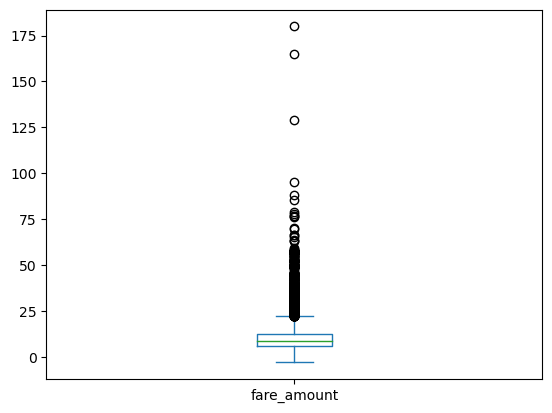

In [39]:
df2['fare_amount'].plot(kind = 'box')

Outlier Show in graph means some payment across 25 to 175 doller ( Some Payment 25 to 175 doller )

<Axes: xlabel='year', ylabel='count'>

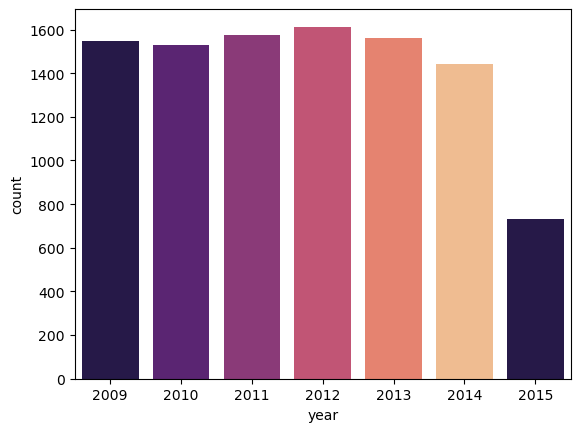

In [40]:
sns.countplot(data = df2 ,x = 'year', palette = sns.color_palette('magma'))

Maximum use of texi by people in 2012 

Minimum use of texi by people 2015 

In [41]:
df2_2015 = df2[df2['year'] ==2015]
df2_2015

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
32,22.54,-74.010483,40.717667,-73.985771,40.660366,1,4.161446,2015,6,21,21,46,34
36,58.00,-73.983330,40.738720,-73.933197,40.847225,1,7.935389,2015,1,11,3,15,38
37,4.50,-73.990173,40.756447,-73.985619,40.762829,1,0.501041,2015,3,12,8,8,38
69,11.50,-73.979279,40.723438,-74.004608,40.746948,6,2.097438,2015,4,12,10,19,5
70,5.00,-73.954796,40.779335,-73.944931,40.780087,1,0.520029,2015,5,12,23,51,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,5.00,-73.964279,40.756546,-73.964241,40.764797,1,0.569359,2015,5,6,7,7,6
9940,6.50,-73.965546,40.762917,-73.956879,40.770081,1,0.671654,2015,5,7,7,49,52
9963,5.00,-73.980034,40.755932,-73.973175,40.758129,1,0.390521,2015,5,18,15,23,54
9992,32.50,-73.946487,40.776642,-73.865013,40.887539,1,8.763126,2015,3,4,20,18,2


<Axes: xlabel='month', ylabel='count'>

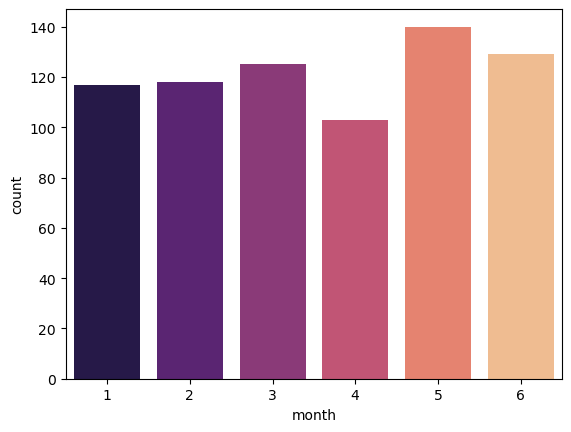

In [42]:
sns.countplot(data = df2_2015 ,x = 'month', palette = sns.color_palette('magma'))

Minimum Use of Texi by People in 2015  because we have only 6 month data of 2015 year 

100 ride crose in all Month

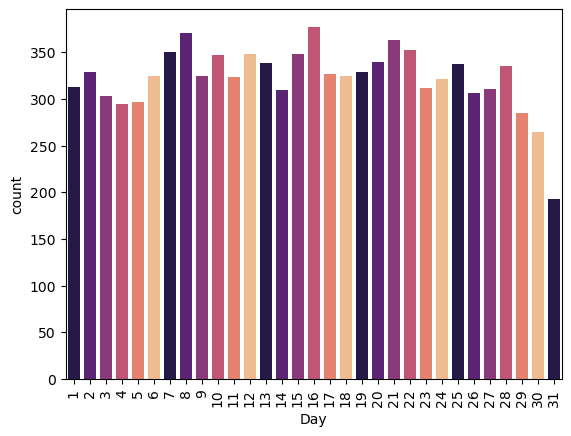

In [43]:
sns.countplot(data = df2 ,x = 'Day', palette = sns.color_palette('magma'))
plt.xticks(rotation = 90)
plt.show()

in every year 8,16,21 cross 300 rites

in date of 31 rides are minimum

# Bi Varient Analysis

<Axes: xlabel='Distance', ylabel='fare_amount'>

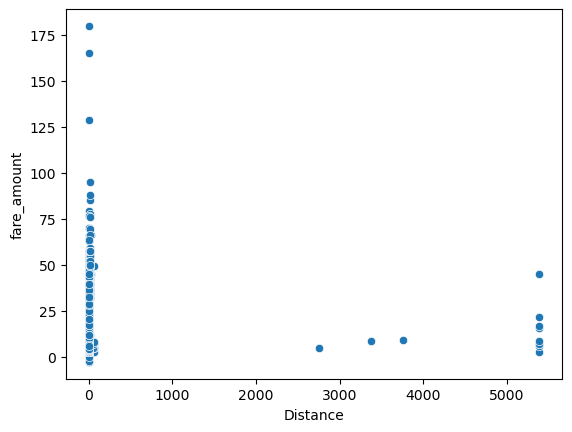

In [44]:
sns.scatterplot(data = df2, x='Distance',y = 'fare_amount')

Some People give 175 doller on 10 km distance 

some people give 50 doller on 50 km distance 

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

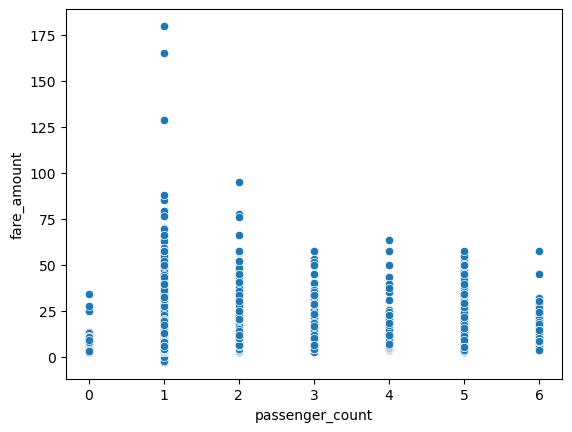

In [45]:
sns.scatterplot(data = df2, x='passenger_count',y = 'fare_amount')

One passengers give highest payment 

# EDA Complete

# Feature Vs Target

In [46]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,4.1,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6.5,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,4.1,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,11.7,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,5.7,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


In [47]:
# feature 

In [48]:
X = df2.drop('fare_amount',axis=1)
X.shape

(9998, 12)

In [49]:
X


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


In [50]:
# Target

In [51]:
y = df2['fare_amount']
y

0        4.1
1        4.5
2       16.9
3        5.7
4        7.7
        ... 
9994     6.5
9995     4.1
9996    11.7
9997     5.7
9998    12.0
Name: fare_amount, Length: 9998, dtype: float64

In [52]:
y.shape

(9998,)

# Train Test Split

In [53]:
# standerd Scalirization 


scaler = StandardScaler()
XX = scaler.fit_transform(X)
XX

array([[-0.14208594,  0.13583489, -0.14108079, ...,  0.22907011,
        -1.03112346, -0.82909791],
       [-0.12987   ,  0.1314944 , -0.12928068, ...,  0.53601147,
        -0.22099058,  0.25030768],
       [-0.14605597,  0.129921  , -0.14229154, ...,  0.38254079,
         1.28354191, -0.00669365],
       ...,
       [-0.14343859,  0.13583803, -0.14082125, ..., -0.53828329,
         0.82060883, -0.82909791],
       [-0.14474252,  0.13579986, -0.14353906, ...,  0.22907011,
         0.4155424 , -0.82909791],
       [-0.14379824,  0.13271214, -0.14183805, ...,  1.30336487,
         0.99420874,  0.04470661]])

In [54]:
X_train, X_test, y_train, y_test =  train_test_split(XX,y,random_state=42,test_size=0.2)

In [55]:
X_train.shape

(7998, 12)

In [56]:
X_test.shape

(2000, 12)

In [57]:
7998 + 2000

9998

In [58]:
df2.shape

(9998, 13)

# Feature Scalling

In [59]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,4.1,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6.5,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,4.1,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,11.7,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,5.7,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


data mix up with integer and float as well as negative and positive value

this problem solve by feature Scalling and convert into 1 standard deviation means 68% data correct

mean of standard scaller is zero 

In [60]:
#scaler = StandardScaler()
#new_X_train = scaler.fit_transform(X_train) 
#new_X_train

In [61]:
#new_X_test = scaler.transform(X_test) 
#new_X_test

# Model Score Check

In [62]:
# Find Model

Linear Regression

In [63]:
model_lr = LinearRegression()

In [64]:
model_lr.fit(X_train ,y_train)

LinearRegression()

In [65]:
model_lr.score( X_test,y_test)

0.013682197046247624

Decision Tree

In [66]:
model_dt = DecisionTreeRegressor()

In [67]:
model_dt.fit(X_train ,y_train)

DecisionTreeRegressor()

In [68]:
model_dt.score( X_test,y_test)

0.5738057486532269

Random Forest

In [69]:
model_rf = RandomForestRegressor()

In [70]:
model_rf.fit(X_train ,y_train)

RandomForestRegressor()

In [71]:
model_rf.score( X_test,y_test)

0.7575966315517899

Support Vector Regressor

In [72]:
model_svr = SVR()

In [73]:
model_svr.fit(X_train ,y_train)

SVR()

In [74]:
model_svr.score( X_test,y_test)

-0.08493029559428233

Ordinary Least Squre 

In [75]:
sm_x_train = sm.add_constant(X_train)

In [76]:
model_sm = sm.OLS(y_train,sm_x_train)

In [77]:
results = model_sm.fit()

In [78]:
results.params

const    11.187681
x1        0.612747
x2        0.396061
x3       -0.285331
x4       -0.101801
x5        0.184494
x6        0.152783
x7        1.045876
x8        0.443631
x9        0.176717
x10      -0.279086
x11      -0.182931
x12       0.015045
dtype: float64

In [79]:
model_sm.score(results.params)

array([ 1.91986025e-12,  2.54981440e-13, -4.04970522e-13,  2.96228437e-13,
       -3.42475071e-13,  3.29975981e-13,  7.49945410e-14, -5.89957056e-13,
       -1.99985443e-14,  3.74972705e-14, -4.34968338e-13, -1.49989082e-14,
       -6.18704964e-14])

In [80]:
len(model_sm.score(results.params))

13

KNN

In [81]:
model_knn = KNeighborsRegressor()

In [82]:
model_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [83]:
model_knn.score(X_test,y_test)

-0.13690220583110668

Lesso 

In [84]:
model_leso = Lasso()

In [85]:
model_leso.fit(X_train,y_train)

Lasso()

In [86]:
model_leso.score(X_test,y_test)

-0.0006468020182841538

Ridge

In [87]:
model_ridge = Ridge()

In [88]:
model_ridge.fit(X_train,y_train)

Ridge()

In [89]:
model_ridge.score(X_test,y_test)

0.013683284465283996

Random Froest give High score compare to other models

# Error Find in all Models

In [90]:
all_error_model =  {'MSE':[],
                   'RMSE':[],
                   'MAE':[],
                   'R2score':[],
                    'Model':[],
                   'Score':[]}



all_models  = [model_lr, model_dt, model_rf, model_knn, model_svr, model_leso, model_ridge]

for i in all_models:
    y_pred = i.predict(X_test)
    
    
    mse = mean_squared_error(y_test,y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test,y_pred)
    r2score  = r2_score(y_test,y_pred)
    
    model_score = i.score(X_test,y_test)
    
    all_error_model['Model'].append(str(i))
    all_error_model['MSE'].append(mse)
    all_error_model['RMSE'].append(rmse)
    all_error_model['MAE'].append(mae)
    all_error_model['R2score'].append(r2score)
    all_error_model['Score'].append(model_score)

all_error_model_df = pd.DataFrame(all_error_model) 
all_error_model_df

,MSE,RMSE,MAE,R2score,Model,Score
0,88.571707,9.411254,5.949106,0.013682,LinearRegression(),0.013682
1,38.272403,6.186469,3.101810,0.573806,DecisionTreeRegressor(),0.573806
2,21.767913,4.665610,2.301841,0.757597,RandomForestRegressor(),0.757597
3,102.094243,10.104170,6.452995,-0.136902,KNeighborsRegressor(),-0.136902
4,97.427146,9.870519,5.410571,-0.084930,SVR(),-0.084930
5,89.858457,9.479370,6.002440,-0.000647,Lasso(),-0.000647
6,88.571610,9.411249,5.949078,0.013683,Ridge(),0.013683


Random Forest Give Minimum error with high Score 

# Boosting Model

In [91]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,4.1,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6.5,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,4.1,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,11.7,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,5.7,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


In [92]:
all_error_model =  {'MSE':[],
                   'RMSE':[],
                   'MAE':[],
                   'R2score':[],
                    'Model':[],
                   'Score':[],
                   'Adaboost':[],
                   'cros_val_score':[],
                   'cross_boost_val_score':[]}



all_models  = [model_lr, model_dt, model_rf, model_knn, model_svr, model_leso, model_ridge]

for i in all_models:
    y_pred = i.predict(X_test)
    
    
    mse = mean_squared_error(y_test,y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test,y_pred)
    r2score  = r2_score(y_test,y_pred)
    
    model_score = i.score(X_test,y_test)
    
    all_error_model['Model'].append(str(i))
    all_error_model['MSE'].append(mse)
    all_error_model['RMSE'].append(rmse)
    all_error_model['MAE'].append(mae)
    all_error_model['R2score'].append(r2score)
    all_error_model['Score'].append(model_score)
    
    boost_model = AdaBoostRegressor( estimator = i, n_estimators=10,learning_rate= 1)
    boost_model.fit(X_train,y_train)
    
    
    boost_score  =  boost_model.score(X_test,y_test)
    
    cros_boost_score  =  cross_val_score(boost_model,XX,y, cv =5 ).mean()
    
    cros_val_score  =   cross_val_score(i,XX,y, cv =5 ).mean()
        
    all_error_model['Adaboost'].append(boost_score)
    all_error_model['cross_boost_val_score'].append(cros_boost_score)
    all_error_model['cros_val_score'].append(cros_val_score)
    
    print(str(i),'done')
    

all_error_model_df = pd.DataFrame(all_error_model) 
all_error_model_df

LinearRegression() done
DecisionTreeRegressor() done
RandomForestRegressor() done
KNeighborsRegressor() done
SVR() done
Lasso() done
Ridge() done


,MSE,RMSE,MAE,R2score,Model,Score,Adaboost,cros_val_score,cross_boost_val_score
0,88.571707,9.411254,5.949106,0.013682,LinearRegression(),0.013682,-0.843833,0.012425,-3.945221
1,38.272403,6.186469,3.101810,0.573806,DecisionTreeRegressor(),0.573806,0.739133,0.573583,0.724284
2,21.767913,4.665610,2.301841,0.757597,RandomForestRegressor(),0.757597,0.756272,0.749988,0.748794
3,102.094243,10.104170,6.452995,-0.136902,KNeighborsRegressor(),-0.136902,-0.533676,-0.174687,-0.779385
4,97.427146,9.870519,5.410571,-0.084930,SVR(),-0.084930,-0.805558,-0.068443,-0.490556
5,89.858457,9.479370,6.002440,-0.000647,Lasso(),-0.000647,-0.032418,-0.000651,-0.059040
6,88.571610,9.411249,5.949078,0.013683,Ridge(),0.013683,0.006500,0.012440,-2.211652


In [93]:
all_error_model_df
all_error_model_df.to_csv(" all_error_model_df.csv ",index = False)


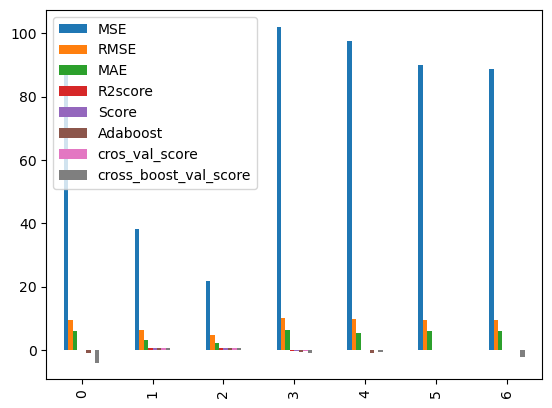

In [94]:
all_error_model_df.plot(kind='bar')
plt.show()

In [95]:
final = all_error_model_df[['Model','Adaboost','cros_val_score','cross_boost_val_score','R2score']]
final

,Model,Adaboost,cros_val_score,cross_boost_val_score,R2score
0,LinearRegression(),-0.843833,0.012425,-3.945221,0.013682
1,DecisionTreeRegressor(),0.739133,0.573583,0.724284,0.573806
2,RandomForestRegressor(),0.756272,0.749988,0.748794,0.757597
3,KNeighborsRegressor(),-0.533676,-0.174687,-0.779385,-0.136902
4,SVR(),-0.805558,-0.068443,-0.490556,-0.084930
5,Lasso(),-0.032418,-0.000651,-0.059040,-0.000647
6,Ridge(),0.006500,0.012440,-2.211652,0.013683


<Axes: xlabel='Model'>

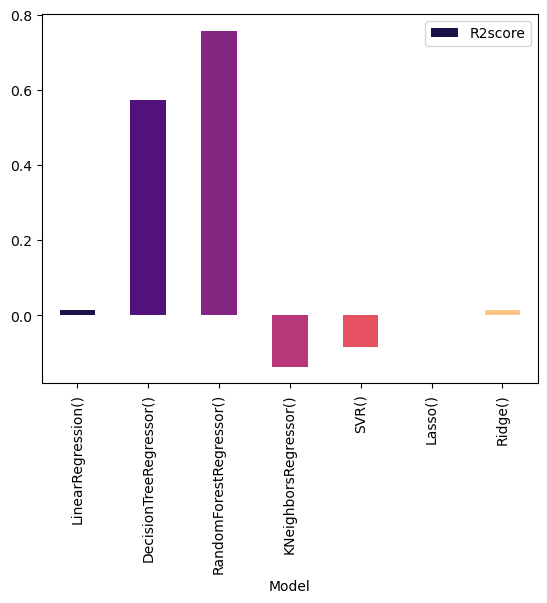

In [96]:
final.plot(kind = 'bar',x = 'Model',y = 'R2score' , color = sns.color_palette('magma',7))

Boosting Score all Model

In [97]:
final_2  =  all_error_model_df[['Model','MSE','RMSE','MAE','R2score']]
final_2

,Model,MSE,RMSE,MAE,R2score
0,LinearRegression(),88.571707,9.411254,5.949106,0.013682
1,DecisionTreeRegressor(),38.272403,6.186469,3.101810,0.573806
2,RandomForestRegressor(),21.767913,4.665610,2.301841,0.757597
3,KNeighborsRegressor(),102.094243,10.104170,6.452995,-0.136902
4,SVR(),97.427146,9.870519,5.410571,-0.084930
5,Lasso(),89.858457,9.479370,6.002440,-0.000647
6,Ridge(),88.571610,9.411249,5.949078,0.013683


<Axes: xlabel='Model'>

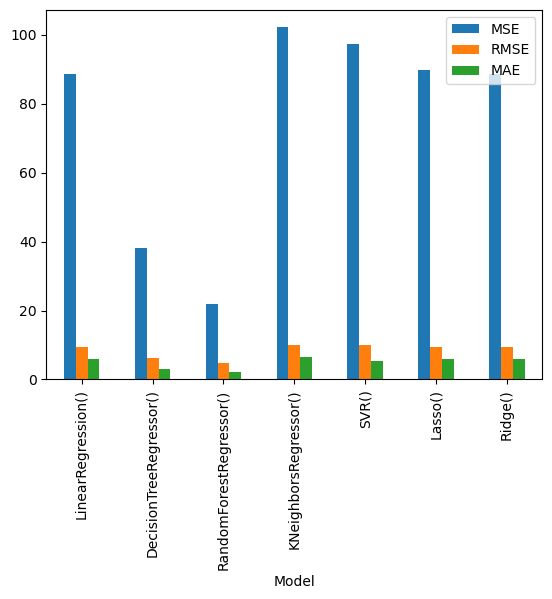

In [98]:
final_2.plot(kind='bar',y=['MSE','RMSE','MAE'] , x= 'Model')

Minimum Error in Random Forest

Random Forest Boosting with high Score and Minimum error

# Random Forest Best Model based on Mean Square Error with R2 Score

# PCA = Principle Component Analysis   

# Random Forest 

In [115]:
pca_object = PCA(0.95)

In [116]:
X_pca = pca_object.fit_transform(X)

In [117]:
X_pca.shape[1]

1

In [118]:
pca_object.explained_variance_ratio_

array([0.96347642])

In [119]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


In [120]:
pca_object.n_components_

1

In [121]:
len(X.columns)

12

PCA Score on 8 Columns

In [122]:
# PCA score on 8 columns 

final_pca = PCA(n_components=8)
final_x = final_pca.fit_transform(X)

In [123]:
final_x.shape[1]

8

In [124]:
final_X_train, final_X_test,final_y_train, final_y_test=train_test_split(final_x , y , test_size=0.2 , random_state=42)

In [125]:
final_model_rf_pca = RandomForestRegressor()
final_model_rf_pca.fit(final_X_train,final_y_train)

RandomForestRegressor()

In [126]:
final_model_rf_pca.score(final_X_test,final_y_test)

0.696183823393006

PCA Score on 1 columns 

In [127]:
pca_1_X_train, pca_1_X_test,pca_1_y_train, pca_1_y_test=train_test_split(X_pca , y , test_size=0.2 , random_state=42)

In [128]:
model_rf_pca_1 = RandomForestRegressor()
model_rf_pca_1.fit(pca_1_X_train, pca_1_y_train)

RandomForestRegressor()

In [129]:
model_rf_pca_1.score(pca_1_X_test,pca_1_y_test )

0.5772979689564879

Conclusion :- PCA perform with 8 columns give accuracy 69 % and PCA perform with 1 columns give accuracy 57%

           PCA did not support that much as accepted 
           
           we will proceed with out PCA

# Random Forest Hyperperameter Tune 

In [130]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
0,4.1,-73.973925,40.748950,-73.966458,40.753695,1,0.510622,2010,4,23,15,12,0
1,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.639764,2009,6,15,17,26,21
2,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5.246511,2010,1,5,16,52,16
3,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.863167,2011,8,18,0,35,0
4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1.737223,2012,4,21,4,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6.5,-74.004429,40.721271,-74.006460,40.739435,3,1.257887,2010,2,15,15,52,46
9995,4.1,-73.983616,40.756005,-73.976169,40.763282,1,0.636248,2010,8,27,8,45,1
9996,11.7,-73.988277,40.748970,-73.963712,40.773958,2,2.152711,2011,10,26,10,44,0
9997,5.7,-74.002112,40.748727,-73.992467,40.756252,1,0.725098,2011,12,16,15,37,0


In [131]:
param = {'n_estimators' : range(50,200),
        'criterion':['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
        'max_features':["sqrt","log2", None] 
        }

In [132]:
model_grid_cv= GridSearchCV(RandomForestRegressor(), param_grid=param,return_train_score=False)

Grid Serach cv is time taken in project out of limit therefor i connsider with out grid serch cv

Total Time  Define for finding Model Score 

In [133]:
start_time = time.time()
mored_rf = RandomForestRegressor()
mored_rf.fit(X_train,y_train)
score = mored_rf.score(X_test,y_test)

end_time= time.time()

print(end_time - start_time)
print(score)

10.53843379020691
0.765389745295163


Total Time only one Parameter complete in  10 second

Threading Concept = Means processsor working Devided in to smaller Parts 

In [134]:



def reurn_score(n_est):
    model_ref = RandomForestRegressor(n_estimators=n_est , criterion= crt ,max_features= mf) 
    model_ref.fit(X_train,y_train)
    score = model_ref.score(X_test,y_test)

In [135]:
all_score = []
all_n_est = []
all_crt = []
all_mf = []

param = {'n_estimators' : range(50,101),
        'criterion':['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
        'max_features':["sqrt","log2", None] 
        }

all_threads = []

ite = 1

for i in param['n_estimators']:
    
    for j in param['criterion']:
        for k in param['max_features']:
            print(ite,i,j,k)
            ite+=1

1 50 friedman_mse sqrt
2 50 friedman_mse log2
3 50 friedman_mse None
4 50 squared_error sqrt
5 50 squared_error log2
6 50 squared_error None
7 50 absolute_error sqrt
8 50 absolute_error log2
9 50 absolute_error None
10 50 poisson sqrt
11 50 poisson log2
12 50 poisson None
13 51 friedman_mse sqrt
14 51 friedman_mse log2
15 51 friedman_mse None
16 51 squared_error sqrt
17 51 squared_error log2
18 51 squared_error None
19 51 absolute_error sqrt
20 51 absolute_error log2
21 51 absolute_error None
22 51 poisson sqrt
23 51 poisson log2
24 51 poisson None
25 52 friedman_mse sqrt
26 52 friedman_mse log2
27 52 friedman_mse None
28 52 squared_error sqrt
29 52 squared_error log2
30 52 squared_error None
31 52 absolute_error sqrt
32 52 absolute_error log2
33 52 absolute_error None
34 52 poisson sqrt
35 52 poisson log2
36 52 poisson None
37 53 friedman_mse sqrt
38 53 friedman_mse log2
39 53 friedman_mse None
40 53 squared_error sqrt
41 53 squared_error log2
42 53 squared_error None
43 53 absolute_e

Total Parameter = 612
Time = 10 Second


In [229]:
612 * 10

6120

In [230]:
# converted in to Hour
6120/3600

1.7

Total Time for complete loop with parameter in 2:10 hour  with out thraeding

# Threading Concept

Means Processor Working Divided in to similar parts are called Thread

In [138]:
import threading as th

def reurn_score(n_est,crt,mf):
    try:
        
        model_ref = RandomForestRegressor(n_estimators=n_est , criterion= crt ,max_features= mf) 
        model_ref.fit(X_train,y_train)
        score = model_ref.score(X_test,y_test)
    
    
        all_score.append(score)
        all_n_est.append(n_est)
        all_crt.append(crt)
        all_mf.append(mf)
        
        print('Try Sucess')
        
    except:
        print('Try Faild')
    

    
# Thread  
    

In [139]:

all_score = []
all_n_est = []
all_crt = []
all_mf = []

param = {'n_estimators' : range(50,101),
        'criterion':['friedman_mse', 'squared_error', 'absolute_error'],
        'max_features':["sqrt","log2", None] 
        }

all_threads = []



for i in param['n_estimators']:
    
    for j in param['criterion']:
        for k in param['max_features']:
            thread = th.Thread(target=reurn_score,args= [i,j,k])
            all_threads.append(thread)
            


In [140]:
start_time = time.time()

for i in all_threads[:10]:
    i.start()
    
for j in all_threads[:10]:
    j.join()
end_time= time.time()
print(end_time - start_time)

final_matrix = {'score': all_score, 'n_estimater' : all_n_est , 'criteria' : all_crt ,'max_feture ' : all_mf }
matrix = pd.DataFrame(final_matrix)
matrix.to_csv('matrix.csv',index = False)
print('CSV Done')


Try Sucess
Try Sucess
Try Sucess
Try Sucess
Try Sucess
Try Sucess
Try Sucess
Try Sucess
Try Sucess
Try Sucess
110.56354284286499
CSV Done


In [231]:
((110/10)*612)/3600

1.87

In [142]:
matrix

,score,n_estimater,criteria,max_feture
0,0.776303,50,squared_error,sqrt
1,0.775674,50,friedman_mse,log2
2,0.777024,50,friedman_mse,sqrt
3,0.771945,50,squared_error,log2
4,0.773582,51,friedman_mse,sqrt
5,0.753794,50,friedman_mse,None
6,0.756493,50,squared_error,None
7,0.776037,50,absolute_error,log2
8,0.774074,50,absolute_error,sqrt
9,0.760350,50,absolute_error,None


Threading and With out Threading time taken is similar

In [143]:
((90/10)*612)/3600

1.53

With Out Threading time taken 1:53 and with Thrading time taken 1:53 minute

# Threading With Train Test Split 

In [149]:
import threading as th

def reurn_score(n_est,crt,mf):
    global counter,fail_counter
    try:
        counter = 1
        fail_counter = 1
        
        X_train, X_test, y_train, y_test =  train_test_split(XX,y,random_state=150-n_est,test_size=0.2)
        model_ref = RandomForestRegressor(n_estimators=n_est , criterion= crt ,max_features= mf) 
        model_ref.fit(X_train,y_train)
        score = model_ref.score(X_test,y_test)
    
    
        all_score.append(score)
        all_n_est.append(n_est)
        all_crt.append(crt)
        all_mf.append(mf)
        all_random_state.append(150-n_est)
        
        print(counter,'Try Sucess')
        counter +=1
                                                            
        
    except:
        print(fail_counter,'Try Faild')
        fail_counter +=1
    


In [150]:
all_score = []
all_n_est = []
all_crt = []
all_mf = []
all_random_state = []
    
param = {'n_estimators' : range(50,101),
        'criterion':['friedman_mse', 'squared_error', 'absolute_error'],
        'max_features':["sqrt","log2", None] 
        }

all_threads = []

ite = 1

for i in param['n_estimators']:
    
    for j in param['criterion']:
        for k in param['max_features']:
            thread = th.Thread(target=reurn_score,args= [i,j,k])
            all_threads.append(thread)
            
print('Done')

Done


In [146]:
start_time = time.time()

for i in  all_threads[:20]:
    i.start()
    
for j in all_threads[:20]:
    j.join()
end_time= time.time()
print(end_time - start_time)

final_matrix = {'score': all_score, 'n_estimater' : all_n_est , 'criteria' : all_crt ,'max_feture ' : all_mf,'Random_state': all_random_state }
matrix = pd.DataFrame(final_matrix)
matrix.to_csv('matrix.csv',index = False)
print('CSV Done')

1 Try Sucess
2 Try Sucess
3 Try Sucess
4 Try Sucess
5 Try Sucess
6 Try Sucess
7 Try Sucess
8 Try Sucess
9 Try Sucess
10 Try Sucess
11 Try Sucess
12 Try Sucess
13 Try Sucess
14 Try Sucess
15 Try Sucess
16 Try Sucess
17 Try Sucess
18 Try Sucess
19 Try Sucess
20 Try Sucess
197.7228124141693
CSV Done


In [147]:
matrix

,score,n_estimater,criteria,max_feture,Random_state
0,0.813457,50,friedman_mse,sqrt,100
1,0.807803,50,friedman_mse,log2,100
2,0.782209,51,squared_error,log2,99
3,0.770212,51,squared_error,sqrt,99
4,0.787029,51,friedman_mse,sqrt,99
5,0.780653,51,friedman_mse,log2,99
6,0.811618,50,squared_error,log2,100
7,0.816914,50,squared_error,sqrt,100
8,0.800666,52,friedman_mse,sqrt,98
9,0.803299,52,friedman_mse,log2,98


In [151]:
start_time = time.time()

for i in  all_threads:
    i.start()
    
for j in all_threads:
    j.join()
end_time= time.time()
print(end_time - start_time)

final_matrix = {'score': all_score, 'n_estimater' : all_n_est , 'criteria' : all_crt ,'max_feture ' : all_mf,'Random_state': all_random_state }
matrix1 = pd.DataFrame(final_matrix)
matrix1.to_csv('matrix1.csv',index = False)
print('CSV Done')

1 Try Sucess
1 Try Sucess
1 Try Sucess
11 Try Sucess
2 Try Sucess
 Try Sucess
1 Try Sucess
2 Try Sucess
1 Try Sucess
2 Try Sucess
2 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
2 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
11 Try Sucess
 Try Sucess
11 Try Sucess
2 Try Sucess
 Try Sucess
1 Try Sucess
1 Try Sucess
11 Try Sucess
1 Try Sucess
2 Try Sucess
 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
2 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
2 Try Sucess
1 Try Sucess
2 Try Sucess
1 Try Sucess
2 Try Sucess
1 Try Sucess
1 Try Sucess
11 Try Sucess
1 Try Sucess
 Try Sucess
1 Try Sucess
22 Try Sucess
 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
1 Try Sucess
11 Try Sucess
2 Try Sucess
 Try Sucess

In [ ]:
matrix1

In [152]:
matrix1

,score,n_estimater,criteria,max_feture,Random_state
0,0.809700,50,friedman_mse,log2,100
1,0.816246,50,friedman_mse,sqrt,100
2,0.810414,50,squared_error,sqrt,100
3,0.783079,51,squared_error,log2,99
4,0.772431,51,squared_error,sqrt,99
...,...,...,...,...,...
454,0.707366,97,absolute_error,None,53
455,0.755040,96,absolute_error,None,54
456,0.789884,99,absolute_error,None,51
457,0.709887,98,absolute_error,None,52


In [153]:
matrix1['score'].max()

0.851572296046304

In [154]:
matrix1[matrix1['score'] == matrix1['score'].max()]

,score,n_estimater,criteria,max_feture,Random_state
246,0.851572,94,squared_error,sqrt,56


Best Perameter with 56 randomstate value and give high score 

# Find Best Perameter Give High Score With Best Model

In [167]:
X_tr, X_te, y_tr, y_te =  train_test_split(X,y,random_state=56,test_size=0.2)

final_model = RandomForestRegressor( n_estimators=94,criterion='squared_error',max_features='sqrt')


In [168]:
final_model.fit(X_tr,y_tr)

RandomForestRegressor(max_features='sqrt', n_estimators=94)

In [169]:
final_model.score(X_te,y_te)

0.8458897932017038

# Save Model Random Forest

In [171]:
import pickle
with open('fare_price.pickle','wb') as f:
    pickle.dump(final_model,f)
    
print('Model Saved Successfully!!!')
    


Model Saved Successfully!!!


# Check Trained Model 

In [172]:
with open('fare_price.pickle','rb') as f:
    saved_model = pickle.load(f)
    
print('Model Load Suceesfully!!!')
    

Model Load Suceesfully!!!


# Calculate Prediction Value 

In [233]:
temp_data =X.sample()
print(saved_model.predict(temp_data)[0])
display(temp_data)

7.125531914893609


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
2189,-73.998262,40.740523,-73.983788,40.726943,1,1.206339,2010,10,19,21,5,0


In [224]:
X['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4, 0], dtype=int64)

# Price Prediction on 1 Passenger

In [227]:
temp_data =X.sample()
print('fare price is :  $',round(saved_model.predict(temp_data)[0],2))
display(temp_data)

fare price is :  $ 54.37


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
4278,-73.987712,40.760107,-73.787011,40.647423,1,13.097119,2014,11,30,12,38,27


# Price Prediction With Passenger Count 

In [228]:
temp_data =X.sample()
no_of_passenger = 12
total_fare = round(saved_model.predict(temp_data)[0],2) * no_of_passenger
print('fare price is :  $',total_fare)
display(temp_data)

fare price is :  $ 558.12


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,Day,Hour,Minute,Second
3620,-73.781602,40.64475,-73.974228,40.76236,5,12.968353,2010,12,22,16,7,0


# With Out Threading

In [ ]:
all_score = []
all_n_est = []
all_crt = []
all_mf = []

param = {'n_estimators' : range(50,101),
        'criterion':['friedman_mse', 'squared_error', 'absolute_error'],
        'max_features':["sqrt","log2", None] 
        }


counter = 1

for i in param['n_estimators']:
    
    for j in param['criterion']:
        for k in param['max_features']:
            model_ref = RandomForestRegressor(n_estimators=i , criterion= j ,max_features= k) 
            model_ref.fit(X_train,y_train)
            score = model_ref.score(X_test,y_test)
    
    
            
            all_score.append(score)
            all_n_est.append(i)
            all_crt.append(j)
            all_mf.append(k)
            print(counter ,"Done")
            counter+=1
            display(clear=True)
        

# This is Time Taken beacuse total 450 time loop in running mode

 #  Problem Phase 

# 1 Check unwanted Columns in Data Set 
 # 2 how to find distance in km ,miles between pickup point to drop point 
 # 3 Pickup Latitude above 90. and remove its row
  # 4 Convert Object into Date time 
 # 5  New column add with year , day ,month time 
#  6 EDA problem :- data present in 2015 only 6 month
#  7 data mix up with integer and float as well as negative and positive value solve by  feature Scalling 

# 8 PCA not be perform good beacuse pca give 86% score on one row
# 9 Find Solution for Hyperparameter Tuning
# 10 Use of Threading Concept for reduce time taken code 
# 11 Problem are not solved 
# 12 Find Predicted Price 

In [237]:
os.getcwd()

'C:\\Users\\arjun\\Machine Learning 2'

Machine Learning 2